# **PROJECT OBJECTIVES**

1. To analyze oil spills in cities **Naugatuck, Danbury, and Middletown** in the  state of Connecticut and with an aim to come up with an optimal solution for distributing **10** service crews among **3 different cities**.
2. To understand the dataset and to come up with valuable insights from the same.




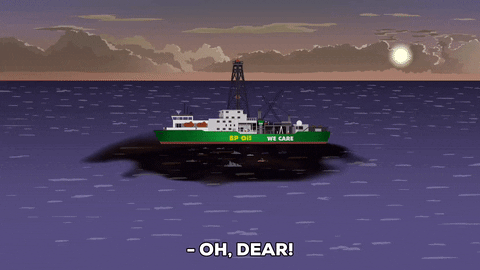

Source: https://giphy.com/gifs/southparkgifs-l0HlKswgRIDvQGP5K

# **IMPORT DATA, MODULES & LIBRARIES**

## **IMPORTING MODULES AND LIBRARIES**

In [ ]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from sympy import Matrix, Rational, pprint, nsimplify # Matrix makes a sympy Matrix, Rational is FRACTION, pprint makes it pretty print, nsimplify converts decimals to fractions (rational numbers)
from fractions import Fraction as Fraction
import re

# plotting
import seaborn as sns

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk #natural language toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **IMPORTING DATA FROM GOOGLE DRIVE**

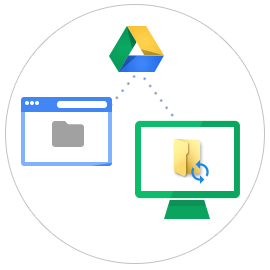

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
URL = 'https://drive.google.com/file/d/1sIIo2DwoIsJPMpQfOkTvz1wn5vkECJR9/view?usp=sharing' # retrieves the JSON data file and builds a dataframe

fixed_path = 'https://drive.google.com/uc?export=download&id='  # Retrieve the CSV data and build a dataframe

file_path = URL.split('/')[-2]

df = pd.read_json(fixed_path + file_path)

print(df.shape) # prints no. of rows and columns

(1000, 29)


# **1: CHECKING OUT THE DATA**

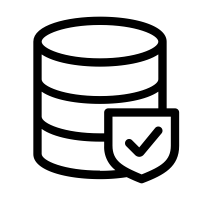

### **SUMMARY OF THE DATASET**

In [ ]:
df.info() # prints the concise summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1000 non-null   int64  
 1   caseno                       1000 non-null   int64  
 2   assignedto                   1000 non-null   object 
 3   date_reported_time_reported  1000 non-null   object 
 4   releasedatetime              1000 non-null   object 
 5   townrelease                  999 non-null    object 
 6   stateofrelease               1000 non-null   object 
 7   reportedby                   999 non-null    object 
 8   representing                 1000 non-null   object 
 9   repstate                     1000 non-null   object 
 10  location                     999 non-null    object 
 11  releasetype                  1000 non-null   object 
 12  releasesubstance             997 non-null    object 
 13  quangallons        

### **VIEWING SAMPLE DATA WITH FIRST 5 ROWS**

In [ ]:
df.head() # prints first few lines from the dataframe

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,location,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,emergencymeasures,waterbody,actions,causeinfo,mediainfo,waterbodiesaffected,discharger,responsibility,repstreet,reptown,repzip
0,2021,202104328,NO Response,2021-10-03T20:56:00.000,2021-10-03T20:00:00.000,Brookfield,CT,Ken,Eversource,CT,3 Cherokee Drive,dielect,Transformer Oil - PCBs >2 ppm,< 5.00,0.00,0,0,0,Clean Harbors contracted to clean.,None,Contracted,"MV Accident, and Trans/Capac.",Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,202104327,NO Response,2021-10-03T19:59:00.000,2021-10-03T19:33:00.000,Bloomfield,CT,Bill,FD,CT,450 Woodland Ave.,petroleum,Gasoline,0.50,0.00,0,0,0,Sanded.,None,Sanded,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,202104326,NO Response,2021-10-03T19:51:00.000,2021-10-03T00:00:00.000,Manchester,CT,fd,Self,CT,61 hills ave,petroleum,gasoline,2.00,0.00,0,0,0,sanded,NaN,Sanded,MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,202104325,NO Response,2021-10-03T18:05:00.000,2021-10-03T00:00:00.000,Woodbridge,CT,fd,fd,CT,hollow oak rd,"petroleum, and chemical",motor vehicle fluids,< 10.00,0.00,0,0,0,sanded,NaN,"Sanded, and Cleaned",MV Accident,Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,202104324,NO Response,2021-10-03T17:45:00.000,2021-10-03T14:50:00.000,Cheshire,CT,Kerry Komisky,Bozzutos,CT,400 Industrial Ave.,petroleum,Diesel,< 2.00,0.00,0,0,0,Cleaned.,None,Cleaned,Other (Unknown),Ground Surface,NaN,NaN,NaN,NaN,NaN,NaN


# **IMPORTING EXTERNAL DATASET FROM DRIVE**

Contractors list has been taken as our secondary dataset. I took this dataset because it helps understand the man-force that  is available to tackle oil spills in each city.
The dataset helps understand if each city has available contractors in case of urgency and severe oil spills. From our analysis and the graph in our project I could see that the city Danbury has no contractors based in the city.

Link: https://portal.ct.gov/DEEP/Waste-Management-and-Disposal/Hazardous-Waste/Transporters 

In [ ]:
# EXT_DATA = pd.read_csv("/content/drive/Shareddrives/BDM/datasets!/External_contarctors_Dataset.csv") # reading external dataset from drive


URL = 'https://drive.google.com/file/d/1-apqAiW0pCF8IDDodKLaHbSMQ6xeadk-/view?usp=sharing' # retrieves the csv data file and builds a dataframe

fixed_path = 'https://drive.google.com/uc?export=download&id='  # retrieve the CSV data and builds a dataframe

file_path = URL.split('/')[-2] # splits the URL by  / and takes the address of the file

EXT_DATA = pd.read_csv(fixed_path + file_path) # assigns the external data to EXT_DATA dataframe

### **VIEWING THE EXTERNAL DATASET**

In [ ]:
EXT_DATA #retrieves external data

,Permit_No,EPA_ID,TransporterName,Address,Town,PhoneNum,PED
0,16 CT-HW-917,CTR000505651,ENVIROTECH OF FAIRFIELD COUNTY INC,115 WOOSTER STREET,BETHEL,(203)748-3111,6/30/2024
1,8 CT-HW-792,CTR000505925,DISPOSAL PLUS LLC,5 NORTHWOOD DRIVE,BLOOMFIELD,(860)242-7068,6/30/2024
2,9 CT-HW-913,CTR000518480,DOUBLE GREEN CIRCLE INC,TERMINAL 114 SCHOOLGROUND ROAD,BRANFORD,(603)303-6857,6/30/2022
3,1 CT-HW-887,NaN,A M RIZZO ELECTRICAL CONTRACTORS INC,64 TRIANGLE STREET,DANBURY,(203)731-3131,6/30/2023
4,12 CT-HW-899,NaN,ENVIROCONSULTANTS & RECYCLERS INC,78 TRIANGLE STREET,DANBURY,(203)702-8833,6/30/2024
5,37 CT-HW-750,NaN,VIOLETTE SILVESTER & SONS INC,65 CHERRY ST,EAST HARTFORD,(860)289-3466,6/30/2023
6,27 CT-HW-669,CT5000001495,NLR INC,250 MAIN ST,EAST WINDSOR,(860)292-1992,6/30/2023
7,34 CT-HW-26,CTD016424210,TRI-S ENVIRONMENTAL SERVICES INC,25 PINNEY ST,ELLINGTON,(860)875-2110,6/30/2022
8,12 CT-HW-26,CTD016424210,TRI-S ENVIRONMENTAL SERVICES INC,25 PINNEY ST,ELLINGTON,(860)875-2110,6/30/2022
9,11 CT-HW-703,CTR000500819,EGC ENVIRONMENTAL SERVICES INC,248 NORTH PARKER HILL ROAD,KILLINGWORTH,(203)395-5418,6/30/2022


# **2: DATA ANALYSIS**

## **DATA MANIPULATION**

**Changing the date_reported_time_reported and releasetime to datetime format (from object)**

In [ ]:
df['date_reported_time_reported'] = pd.to_datetime(df['date_reported_time_reported']) # changing object to datetime dtype
df['releasedatetime'] = pd.to_datetime(df['releasedatetime']) # changing object to datetime dtype

**Checking for nulls**

In [ ]:
df.isnull().sum() # prints the count of nulls in all columns

year                             0
caseno                           0
assignedto                       0
date_reported_time_reported      0
releasedatetime                  0
townrelease                      1
stateofrelease                   0
reportedby                       1
representing                     0
repstate                         0
location                         1
releasetype                      0
releasesubstance                 3
quangallons                      1
quanyards                        0
quanfeet                         0
quandrums                        0
quanlbs                          0
emergencymeasures              249
waterbody                      795
actions                         43
causeinfo                       18
mediainfo                        3
waterbodiesaffected            919
discharger                     688
responsibility                 950
repstreet                      920
reptown                        925
repzip              

**Dropping columns with maximum null values**

In [ ]:
dropping_list = ['waterbodiesaffected', 'discharger','responsibility', 'repstreet', 'reptown', 'waterbody','emergencymeasures', 'repzip'  ]
df.drop(dropping_list,axis=1,inplace=True)

**Checking for nulls again to confirm**

In [ ]:
df.isnull().sum()

year                            0
caseno                          0
assignedto                      0
date_reported_time_reported     0
releasedatetime                 0
townrelease                     1
stateofrelease                  0
reportedby                      1
representing                    0
repstate                        0
location                        1
releasetype                     0
releasesubstance                3
quangallons                     1
quanyards                       0
quanfeet                        0
quandrums                       0
quanlbs                         0
actions                        43
causeinfo                      18
mediainfo                       3
dtype: int64

**Dropping all the null values**

In [ ]:
# All columns list
columns = list(df.columns) # lists all the columns
df = df.dropna(subset = columns) # drops the null values

**A final check on null values**

In [ ]:
#ALL NULL VALUES ARE REMOVED
df.isnull().sum() # gives the list of columns with the sum of null values in each

year                           0
caseno                         0
assignedto                     0
date_reported_time_reported    0
releasedatetime                0
townrelease                    0
stateofrelease                 0
reportedby                     0
representing                   0
repstate                       0
location                       0
releasetype                    0
releasesubstance               0
quangallons                    0
quanyards                      0
quanfeet                       0
quandrums                      0
quanlbs                        0
actions                        0
causeinfo                      0
mediainfo                      0
dtype: int64

**Information on the dataframe df**

We can see that there are no more nulls. We can confirm this by looking at the number of entries and the non-null count which is 949 in both the cases based on the output below. Also, we can notice that the dtypes of date_reported_time_reported and releasedatetime are changed to datetime instead of object in the original data set.

In [ ]:
df.info() # prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         949 non-null    int64         
 1   caseno                       949 non-null    int64         
 2   assignedto                   949 non-null    object        
 3   date_reported_time_reported  949 non-null    datetime64[ns]
 4   releasedatetime              949 non-null    datetime64[ns]
 5   townrelease                  949 non-null    object        
 6   stateofrelease               949 non-null    object        
 7   reportedby                   949 non-null    object        
 8   representing                 949 non-null    object        
 9   repstate                     949 non-null    object        
 10  location                     949 non-null    object        
 11  releasetype                  949 non-null    

**Removing insignificant columns**

In [ ]:
df['quangallons'] = df['quangallons'].str.split('<').str[-1] # splits the string from character <
df['quangallons'] = df['quangallons'].str.split('~').str[-1] # splits the string from character ~
df['quangallons'] = df['quangallons'].str.split('+').str[-1] # splits the string from character +
df['quangallons'] =  df['quangallons'].str.strip() # removes any spaces or specified characters at the start and end of a string
df['quangallons'] =  df['quangallons'].astype(float) # convert the dtype of quangallons to float

**Removing insignificant columns**

In [ ]:
df['quanyards'] = df['quanyards'].str.split('<').str[-1] # splits the string from character <
df['quanyards'] = df['quanyards'].str.split('~').str[-1] # splits the string from character ~
df['quanyards'] = df['quanyards'].str.split('+').str[-1] # splits the string from character +
df['quanyards'] =  df['quanyards'].astype(float)  # removes any spaces or specified characters at the start and end of a string
df.head() # convert the dtype of quangallons to float

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,location,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,actions,causeinfo,mediainfo
0,2021,202104328,NO Response,2021-10-03 20:56:00,2021-10-03 20:00:00,Brookfield,CT,Ken,Eversource,CT,3 Cherokee Drive,dielect,Transformer Oil - PCBs >2 ppm,5.0,0.0,0,0,0,Contracted,"MV Accident, and Trans/Capac.",Ground Surface
1,2021,202104327,NO Response,2021-10-03 19:59:00,2021-10-03 19:33:00,Bloomfield,CT,Bill,FD,CT,450 Woodland Ave.,petroleum,Gasoline,0.5,0.0,0,0,0,Sanded,MV Accident,Ground Surface
2,2021,202104326,NO Response,2021-10-03 19:51:00,2021-10-03 00:00:00,Manchester,CT,fd,Self,CT,61 hills ave,petroleum,gasoline,2.0,0.0,0,0,0,Sanded,MV Accident,Ground Surface
3,2021,202104325,NO Response,2021-10-03 18:05:00,2021-10-03 00:00:00,Woodbridge,CT,fd,fd,CT,hollow oak rd,"petroleum, and chemical",motor vehicle fluids,10.0,0.0,0,0,0,"Sanded, and Cleaned",MV Accident,Ground Surface
4,2021,202104324,NO Response,2021-10-03 17:45:00,2021-10-03 14:50:00,Cheshire,CT,Kerry Komisky,Bozzutos,CT,400 Industrial Ave.,petroleum,Diesel,2.0,0.0,0,0,0,Cleaned,Other (Unknown),Ground Surface


**Looking the information of dataset for a change in Dtype**

We can notice that the Dtypes of quangallons and quanyards has changed to float instead of object. This is due to the removal of strings like <, ~, + from the vlaues. Thus, we not have all float numbers in the columns quangallons and quanyards. 

In [ ]:
df.info() # prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         949 non-null    int64         
 1   caseno                       949 non-null    int64         
 2   assignedto                   949 non-null    object        
 3   date_reported_time_reported  949 non-null    datetime64[ns]
 4   releasedatetime              949 non-null    datetime64[ns]
 5   townrelease                  949 non-null    object        
 6   stateofrelease               949 non-null    object        
 7   reportedby                   949 non-null    object        
 8   representing                 949 non-null    object        
 9   repstate                     949 non-null    object        
 10  location                     949 non-null    object        
 11  releasetype                  949 non-null    

**Looking at the summary statistics of the modified dataframe**

In [ ]:
df.describe() # prints the summary statistics of the dataframe df

,year,caseno,quangallons,quanyards,quanfeet,quandrums,quanlbs
count,949.0,9.490000e+02,949.000000,949.000000,949.0,949.000000,949.00000
mean,2021.0,2.021038e+08,14.043446,0.034773,0.0,0.001054,0.31823
std,0.0,2.885585e+02,73.042114,0.760200,0.0,0.032461,9.73856
min,2021.0,2.021033e+08,0.000000,0.000000,0.0,0.000000,0.00000
25%,2021.0,2.021036e+08,0.250000,0.000000,0.0,0.000000,0.00000
50%,2021.0,2.021038e+08,2.000000,0.000000,0.0,0.000000,0.00000
75%,2021.0,2.021041e+08,5.000000,0.000000,0.0,0.000000,0.00000
max,2021.0,2.021043e+08,1087.000000,18.000000,0.0,1.000000,300.00000


**Printing unique values of causeinfo column**

In [ ]:
df['causeinfo'].unique()  # fetches unique values fom cause info to analyse

array(['MV Accident, and Trans/Capac.', 'MV Accident', 'Other (Unknown)',
       'Fire', 'Hose Failure', 'Saddle Tank Failure', 'Trans/Capac.',
       'Other (Displaced insulation)', 'Sinking', 'Container Failure',
       'Dumping', 'Inground Tank Failure', 'Other (unknown)',
       'Above Ground Tank Failure', 'OVERFILL', 'Transfer Line Failure',
       'Pump Failure', 'Other (Unknown - disabled MV)',
       'Other (historic release)',
       'Above Ground Tank Failure, and Other (manhole door in tank ruptured)',
       'Saddle Tank Failure, and Other (road debris)',
       'Container Failure, and Dumping, and Vandalism',
       'Hose Failure, and Other (repaired)', 'Fuel Tank Failure',
       'Hose Failure, and Above Ground Tank Failure', 'Other (unk)',
       'Other (nozzle failure)',
       'Hose Failure, and Other (hydaulic line failure on loader)',
       'MV Accident, and Other (car into building)',
       'Other (car drove off with nozzle)', 'Other (leaking nozzle)',
       'Tr

**Transforming categories - causeinfo**

This is to avoid redundancy / duplication in the columns values or categories of causeinfo due to a difference in upper case & lower case, extra or no space in multi term words etc. Also, we are trying to categorize all values with other into a single category called 'Other'. 

In [ ]:
# SettingWithCopyWarning in Pandas to none beacuse default is warn
pd.options.mode.chained_assignment = None 

#Transforming categories for better visualizations
df.loc[df['causeinfo'].str.contains('MV Accident'), 'causeinfo'] = 'MV Accident'     #transforming data which contains MV Accident to MV Accident
df.loc[df['causeinfo'].str.contains('Fire'), 'causeinfo'] = 'Fire'                   #transforming data which contains Fire to Fire
df.loc[df['causeinfo'].str.contains('Trans/Capac.'), 'causeinfo'] = 'Trans/Capac.'   #transforming data which contains Trans/Capac to Trans/Capac
df.loc[df['causeinfo'].str.contains('Other'), 'causeinfo'] = 'Other'                 #transforming data which contains Other to Other
df.loc[df['causeinfo'].str.contains('OVERFILL'), 'causeinfo'] = 'OVERFILL'           #transforming data which contains OVERFILL to OVERHILL
df.loc[df['causeinfo'].str.contains('Tank Failure'), 'causeinfo'] = 'Tank Failure'   #transforming data which contains Tank Failure to Tank Failure
df.loc[df['causeinfo'].str.contains('Natural'), 'causeinfo'] = 'Natural'             #transforming data which contains Natural to Natural
df.loc[df['causeinfo'].str.contains('Hose Failure'), 'causeinfo'] = 'Hose Failure'   #transforming data which contains Hose Failure to Hose Failure
df.loc[df['causeinfo'].str.contains('Dumping'), 'causeinfo'] = 'Dumping'             #transforming data which contains Dumping to Dumping
df.loc[df['causeinfo'].str.contains('Sinking'), 'causeinfo'] = 'Sinking'             #transforming data which contains Sinking to Sinking 
df.loc[df['causeinfo'].str.contains('Valve Failure'), 'causeinfo'] = 'Valve Failure' #transforming data which contains Valve Failure to Valve Failure
df.loc[df['causeinfo'].str.contains('Pump Failure'), 'causeinfo'] = 'Pump Failure'   #transforming data which contains Pump Failure to Pump Failure
df.loc[df['causeinfo'].str.contains('Blow Back'), 'causeinfo'] = 'Blow Back'         #transforming data which contains Blow Back to Blow Back
df.loc[df['causeinfo'].str.contains('Open Hatch'), 'causeinfo'] = 'Open Hatch'       #transforming data which contains Open Hatch to Open Hatch

df['causeinfo'].unique() # fetches unique values from causeinfo after transformation

array(['MV Accident', 'Other', 'Fire', 'Hose Failure', 'Tank Failure',
       'Trans/Capac.', 'Sinking', 'Container Failure', 'Dumping',
       'OVERFILL', 'Transfer Line Failure', 'Pump Failure', 'Seepage',
       'Valve Failure', 'Blow Back', 'Natural'], dtype=object)

**Printing unique values of releasetype column**

In [ ]:
df['releasetype'].unique()  # fetches unique values from releasetype for analysis

array(['dielect', 'petroleum', 'petroleum, and chemical', 'chemical',
       'other (unknown)', 'not specified', 'sewage related',
       'hazardous waste', 'other (white powder)', 'gas emission',
       'other (unk)', 'other (wood)',
       'petroleum, and chemical, and dielect', 'other (waste water)',
       'other (water)', 'other (asbestos)', 'other (Unknown)',
       'other (none showing)', 'other (CONTAMINATED SOIL)',
       'other (SOIL)', 'other (STORM WATER)', 'other (Water)',
       'other (sand)'], dtype=object)

**Transforming categories - releasetype**

This is to avoid redundancy / duplication in the columns values or categories of causeinfo due to a difference in upper case & lower case, extra or no space in multi term words etc. Also, we are trying to categorize all values with other into a single category called 'Other'. 

In [ ]:
# Transforming categories for better visualizations

df.loc[df['releasetype'].str.contains('chemical, and other (WATER)'), 'releasetype'] = 'chemical' #transforming rows which contains chemical, and other (WATER) to chemical
df.loc[df['releasetype'].str.contains('Other'), 'releasetype'] = 'Other'                          #transforming rows which contains Other to Other
df.loc[df['releasetype'].str.contains('other'), 'releasetype'] = 'Other'                          #transforming rows which contains other to Other


df['releasetype'].unique() # fetches unique values from causeinfo after transformation


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['dielect', 'petroleum', 'petroleum, and chemical', 'chemical',
       'Other', 'not specified', 'sewage related', 'hazardous waste',
       'gas emission', 'petroleum, and chemical, and dielect'],
      dtype=object)

**Using releasetype columns as the title**

This is done in order to produce the plot 1. 

In [ ]:
df['releasetype'] = df['releasetype'].str.title() # makes the releasetype as title
df['releasetype'].unique() # gives an array of unique releasetypes only

array(['Dielect', 'Petroleum', 'Petroleum, And Chemical', 'Chemical',
       'Other', 'Not Specified', 'Sewage Related', 'Hazardous Waste',
       'Gas Emission', 'Petroleum, And Chemical, And Dielect'],
      dtype=object)

## **EXPLORATORY DATA ANALYSIS**

### **PLOT 1: SPILLS COUNT BY RELEASETYPE**

The plot 1 is a bar plot with the releasetype on x-axis and the count of releasetype on y-axis. This plot aims at identifying the release type that has highest number of spills in the state of Conencticut. 

From the graph, it can be observed that Petroleum has the highest number of spillage incidents in the given period with more than 500 followed by chemical spillage and dielect. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SPILLS COUNT BY RELEASETYPE')

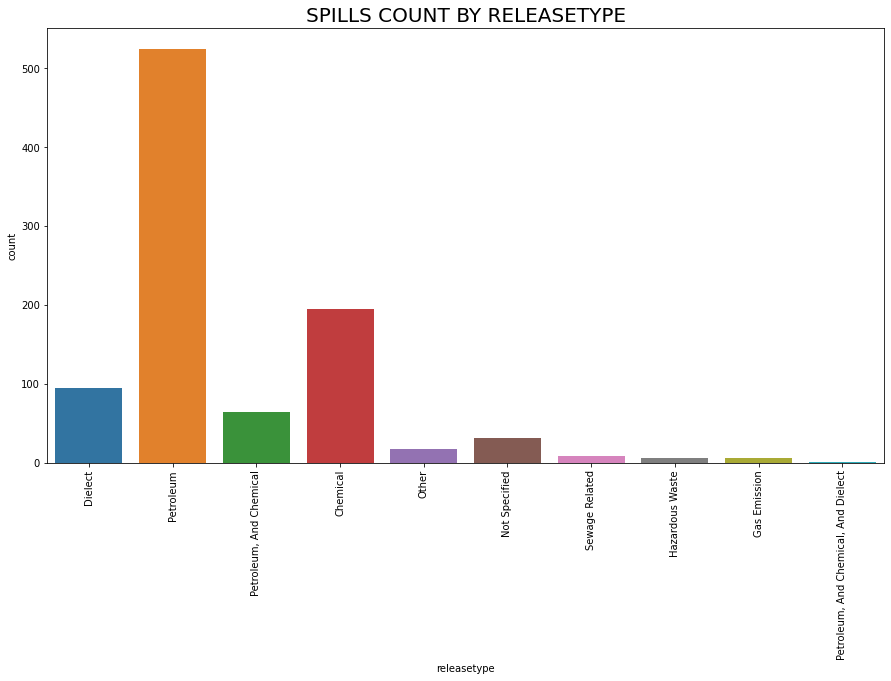

In [ ]:
plt.pyplot.figure(figsize = (15,8)) # restricts the x and y axis dimensions of the overall figure layout
p1 = sns.countplot(df['releasetype']); # shows the counts of observations in each releasetype bin using bars
p1.set_xticklabels(p1.get_xticklabels(),rotation = 90) # xticks are labelled vertically 
p1.set_title("SPILLS COUNT BY RELEASETYPE", fontsize=20)

### **PLOT 2: TREND OF PETROLEUM SPILLAGE QUANGALLONS BY TIME REPORTED**

The plot 2 is a line plot between the time reported on x-axis and the total quangallons of oil spillage on y-axis. This graph mainly focuses on identifying if there is a trend of quantity of petroleum spillage over the reported time. 

It has been observed that approx. 1000 and more quangallon of petroleum spillage in the last week of August and the first week of September. This can be referred to the three peaks in the below line plot. 

Text(0.5, 1.0, 'PETROLEUM SPILLAGE QUANGALLONS BY TIME REPORTED')

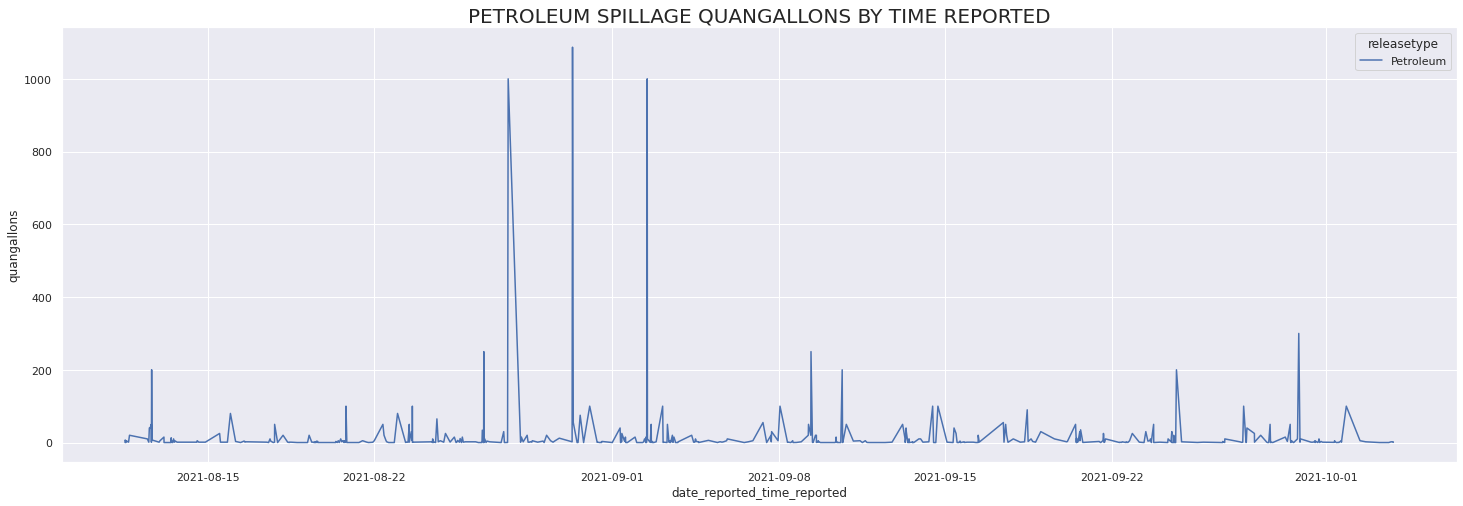

In [ ]:
sns.set_theme(style="darkgrid") # adds a dark background and grid

plt.pyplot.figure(figsize = (25,8)) # restricts the x and y axis dimensions of the overall figure layout
p2 = sns.lineplot(x="date_reported_time_reported", y="quangallons",
             hue="releasetype" ,# style="event",
             data=df[df['releasetype'] == 'Petroleum']) # draws a line plot with possibility of several semantic groupings
p2.set_title("PETROLEUM SPILLAGE QUANGALLONS BY TIME REPORTED", fontsize=20)

### **PLOT 3: CITYWISE OIL SPILLAGE IN QUANGALLONS**

The plot 3 is a bar plot between the city on x-axis and the total quangallons of oil spillage on y-axis. This graph mainly focuses on identifying the total quangallons of oil spillage within a city.

For example, Southington has the highest release of spillage with approximately 1,233 gallons followed by Waterbury and Fairfield in second and third places respectively.  


**Grouping the sum of quangallons by townrelease and sorting them in descending order i.e., highest spillage to the lowest**

In [ ]:
#City wise number of Gallons
df['townrelease'] = df['townrelease'].str.upper() #Converting TownRelease to Upper Case
x = df.groupby(["townrelease"], as_index=False).agg({"quangallons": np.sum}) # group by the townrelease and shows the sum of quangallons in each town and saves to a new data frame x
x = x.sort_values("quangallons", ascending=False) # sorts the quangallon values from highest to lowest
x.head(5) #retrieves the top 5 rows

,townrelease,quangallons
112,SOUTHINGTON,1233.00
128,WATERBURY,1167.50
41,FAIRFIELD,1032.25
42,FARMINGTON,1023.25
11,BRIDGEPORT,711.25


**Plotting the barplot for spillage in the top 10 cities**

Text(0.5, 1.0, 'CITYWISE OIL SPILLAGE IN QUANGALLONS (TOP 10 CITIES)')

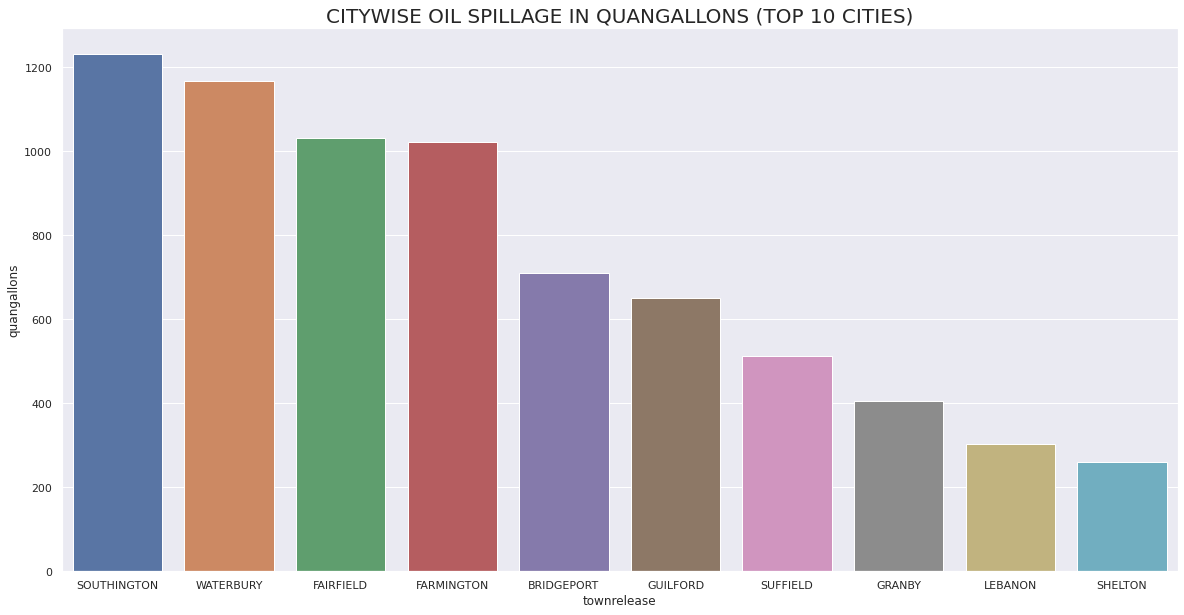

In [ ]:
plt.pyplot.figure(figsize = (20,10)) # restricts the x and y axis dimensions of the overall figure layout
p3 = sns.barplot(x="townrelease", y="quangallons", data=x.iloc[:10]) # aggregates the townrelease according to the means of quangallons in each town and generates a bar plot. In this case iloc limits the top 10 values only
p3.set_title("CITYWISE OIL SPILLAGE IN QUANGALLONS (TOP 10 CITIES)", fontsize = 20)

### **PLOT 4: RELEASE TYPE OF OIL SPILLAGE BY QUANGALLONS**

The plot 4 is a histogram between the release type on x-axis and the quangallons on y-axis. This graph mainly focuses on identifying the sum of quangallons released for each type.

For example, in the state of Conencticut, petroleum is the most common type of oil spillage followed by gas emmissions and checmical in second and third places. 

**Grouping the sum of quangallons by releasetype and sorting them in descending order i.e., highest spillage to the lowest**

In [ ]:
# Quantity of releasetype in gallons

x = df.groupby(["releasetype"], as_index=False).agg({"quangallons": np.sum}) # group by the releasetype and shows the sum of quangallons in each type and saves to a new data frame x
x = x.sort_values("quangallons", ascending=False) # sorts the quangallon values from highest to lowest
x.head(5) # retrieves the first 5 rows

,releasetype,quangallons
6,Petroleum,8791.03
2,Gas Emission,1000.00
0,Chemical,978.05
9,Sewage Related,803.00
1,Dielect,749.13


Text(0.5, 1.0, 'RELEASE TYPE OF OIL SPILLAGE BY QUANGALLONS')

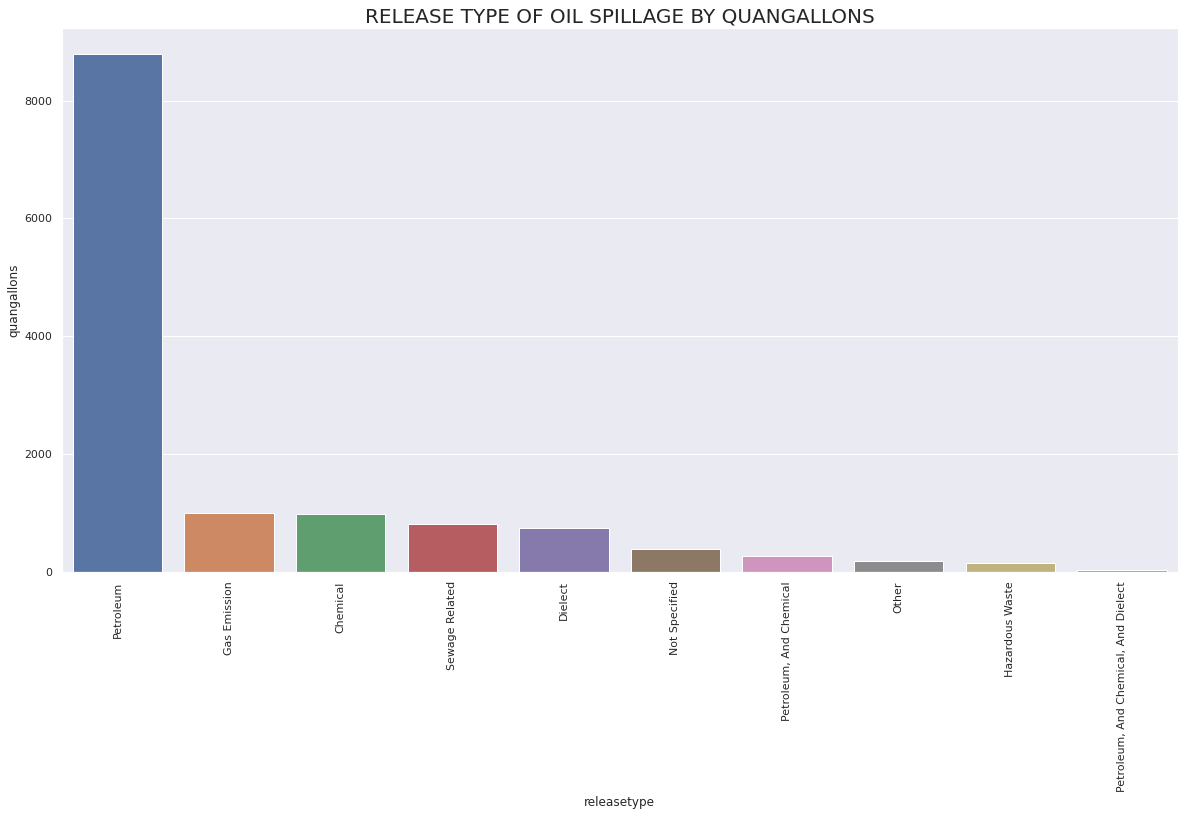

In [ ]:
plt.pyplot.figure(figsize = (20,10)) # restricts the x and y axis dimensions of the overall figure layout
p4 = sns.barplot(x="releasetype", y="quangallons", data=x.iloc[:10]) # aggregates the releasetype according to the means of quangallons in each type and generates a bar plot. In this case iloc limits the top 10 values only
p4.set_xticklabels(p4.get_xticklabels(),rotation = 90) # xticks are labelled vertically 
p4.set_title("RELEASE TYPE OF OIL SPILLAGE BY QUANGALLONS", fontsize=20)

### **PLOT 5: RELEASE TYPE BY CITY** 

***PRE-PROCESSING FOR THE PLOT 5***

The plot 5 is a stacked bar plot between the count of release type in each city on x-axis and the townrelease on y-axis. This graph mainly focuses on identifying the quangallons of each type within a city.  

**Grouping the sum of quangallons by releasetype and townrelease and sorting them in descending order**

In [ ]:
# City wise number of Gallons

x = df.groupby(["releasetype", "townrelease" ], as_index=False).agg({"quangallons": np.sum}) # group by the releasetype and townrelease and shows the sum of quangallons in each type and town and saves to a new data frame x
x = x.sort_values("quangallons", ascending=False) # sorts the quangallon values from highest to lowest
x # shows the entire x dataframe

,releasetype,townrelease,quangallons
289,Petroleum,WATERBURY,1143.50
215,Petroleum,FAIRFIELD,1030.25
216,Petroleum,FARMINGTON,1003.00
133,Gas Emission,SOUTHINGTON,1000.00
349,Sewage Related,SUFFIELD,500.00
...,...,...,...
172,Other,DANBURY,0.00
171,Other,COLUMBIA,0.00
169,Other,BERLIN,0.00
168,Other,ANSONIA,0.00


**Using crosstab to build a table to know the frequencies**

In [ ]:
z = pd.crosstab(df.townrelease, df.releasetype, values = df.quangallons, aggfunc= sum) # builds a cross-tabulation table that can show the frequency with which releasetypes appear and saves it to a new dataframe z
z # shows the entire z dataframe

releasetype,Chemical,Dielect,Gas Emission,Hazardous Waste,Not Specified,Other,Petroleum,"Petroleum, And Chemical","Petroleum, And Chemical, And Dielect",Sewage Related
townrelease,,,,,,,,,,
ANDOVER,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
ANSONIA,2.0,NaN,NaN,NaN,NaN,0.0,20.0,NaN,NaN,NaN
ASHFORD,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AVON,NaN,1.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
BARKHAMSTED,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
WINDSOR,6.0,NaN,NaN,NaN,130.0,NaN,1.0,NaN,NaN,NaN
WINDSOR LOCKS,8.0,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN
WOLCOTT,18.0,1.0,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN


**Renaming the index as Items**

In [ ]:
# z.reset_index()
z = z.rename(columns = {'index':'Items'}) # renaming the index name as Items
z.reset_index(inplace= True) # resetting the index values 
z # shows the entire z dataframe

releasetype,townrelease,Chemical,Dielect,Gas Emission,Hazardous Waste,Not Specified,Other,Petroleum,"Petroleum, And Chemical","Petroleum, And Chemical, And Dielect",Sewage Related
0,ANDOVER,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
1,ANSONIA,2.0,NaN,NaN,NaN,NaN,0.0,20.0,NaN,NaN,NaN
2,ASHFORD,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,AVON,NaN,1.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
4,BARKHAMSTED,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
141,WINDSOR,6.0,NaN,NaN,NaN,130.0,NaN,1.0,NaN,NaN,NaN
142,WINDSOR LOCKS,8.0,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN
143,WOLCOTT,18.0,1.0,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN
144,WOODBRIDGE,NaN,10.0,NaN,NaN,NaN,NaN,4.0,10.0,NaN,NaN


**Setting townrelease for index in the dataframe**

In [ ]:
z.index = list(z['townrelease'])
z # shows the entire z dataframe

releasetype,townrelease,Chemical,Dielect,Gas Emission,Hazardous Waste,Not Specified,Other,Petroleum,"Petroleum, And Chemical","Petroleum, And Chemical, And Dielect",Sewage Related
ANDOVER,ANDOVER,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
ANSONIA,ANSONIA,2.0,NaN,NaN,NaN,NaN,0.0,20.0,NaN,NaN,NaN
ASHFORD,ASHFORD,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AVON,AVON,NaN,1.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
BARKHAMSTED,BARKHAMSTED,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
WINDSOR,WINDSOR,6.0,NaN,NaN,NaN,130.0,NaN,1.0,NaN,NaN,NaN
WINDSOR LOCKS,WINDSOR LOCKS,8.0,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN
WOLCOTT,WOLCOTT,18.0,1.0,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN
WOODBRIDGE,WOODBRIDGE,NaN,10.0,NaN,NaN,NaN,NaN,4.0,10.0,NaN,NaN


**Filling 0 in all the nullvalues in each column**

In [ ]:
columns  = list(z.columns)

for i in columns:
    z[i] = z[i].fillna(0) # checks and fills each of the nulls with 0 in all the columns in z dataframe

columns.pop(0)
columns

['Chemical',
 'Dielect',
 'Gas Emission',
 'Hazardous Waste',
 'Not Specified',
 'Other',
 'Petroleum',
 'Petroleum, And Chemical',
 'Petroleum, And Chemical, And Dielect',
 'Sewage Related']

**Adding a column called 'orderby' which is the sum of values in all the columns**

This is done to get the total quantity of quangallons of all the chemicals in each city as a separate column in the dataframe. 

In [ ]:
#z["orderby"] = z['Biomedical'] + z['Chemical'] + z['Dielect'] + z['Gas Emission'] + z['Hazardous Waste'] + z['Not Specified'] + z['Other'] + z['Petroleum'] + z['Petroleum, And Chemical'] + z['Sewage Related'] # adds a column called orderby by adding the mentioned (existing) columns in the dataframe
z["orderby"] = z[columns].sum(axis=1)
z = z.sort_values("orderby", ascending=False) # sorting the values in orderby column in descending order
z = z.iloc[0:11, :] # only top 10 rows are retrieved
z

releasetype,townrelease,Chemical,Dielect,Gas Emission,Hazardous Waste,Not Specified,Other,Petroleum,"Petroleum, And Chemical","Petroleum, And Chemical, And Dielect",Sewage Related,orderby
SOUTHINGTON,SOUTHINGTON,29.25,0.00,1000.0,0.0,6.00,0.0,196.75,1.00,0.0,0.0,1233.00
WATERBURY,WATERBURY,14.00,0.00,0.0,0.0,10.00,0.0,1143.50,0.00,0.0,0.0,1167.50
FAIRFIELD,FAIRFIELD,0.00,2.00,0.0,0.0,0.00,0.0,1030.25,0.00,0.0,0.0,1032.25
FARMINGTON,FARMINGTON,0.00,20.00,0.0,0.0,0.00,0.0,1003.00,0.25,0.0,0.0,1023.25
BRIDGEPORT,BRIDGEPORT,200.00,202.00,0.0,0.0,0.25,0.0,209.00,0.00,0.0,100.0,711.25
GUILFORD,GUILFORD,0.00,0.00,0.0,0.0,0.00,0.0,450.00,0.00,0.0,200.0,650.00
SUFFIELD,SUFFIELD,3.00,3.00,0.0,0.0,0.00,0.0,2.00,5.00,0.0,500.0,513.00
GRANBY,GRANBY,0.00,2.00,0.0,0.0,200.00,0.0,203.00,0.00,0.0,0.0,405.00
LEBANON,LEBANON,0.00,0.00,0.0,0.0,3.00,0.0,300.00,0.00,0.0,0.0,303.00
SHELTON,SHELTON,1.00,0.00,0.0,0.0,0.00,0.0,260.00,0.00,0.0,0.0,261.00


**Checking the shape of dataframe to see if all the above steps are done appropriately**

In [ ]:
z # shows the entire z dataframe
z.shape

(11, 12)

### **PLOT 5: RELEASETYPE BY CITY**

After completing the required pre-processing of the data, we plot for the count of each releasetype by the city in a stacked bar plot.

The plot 5 is a stacked bar plot between the count of release type in each city on x-axis and the townrelease on y-axis. This graph mainly focuses on identifying the quangallons of each type within a city. 

For example, in the cities Farmington, Lebanon Petroleum is the most common type of oil spill release type. In Southington, the releasetype is majorly gas emmissions.

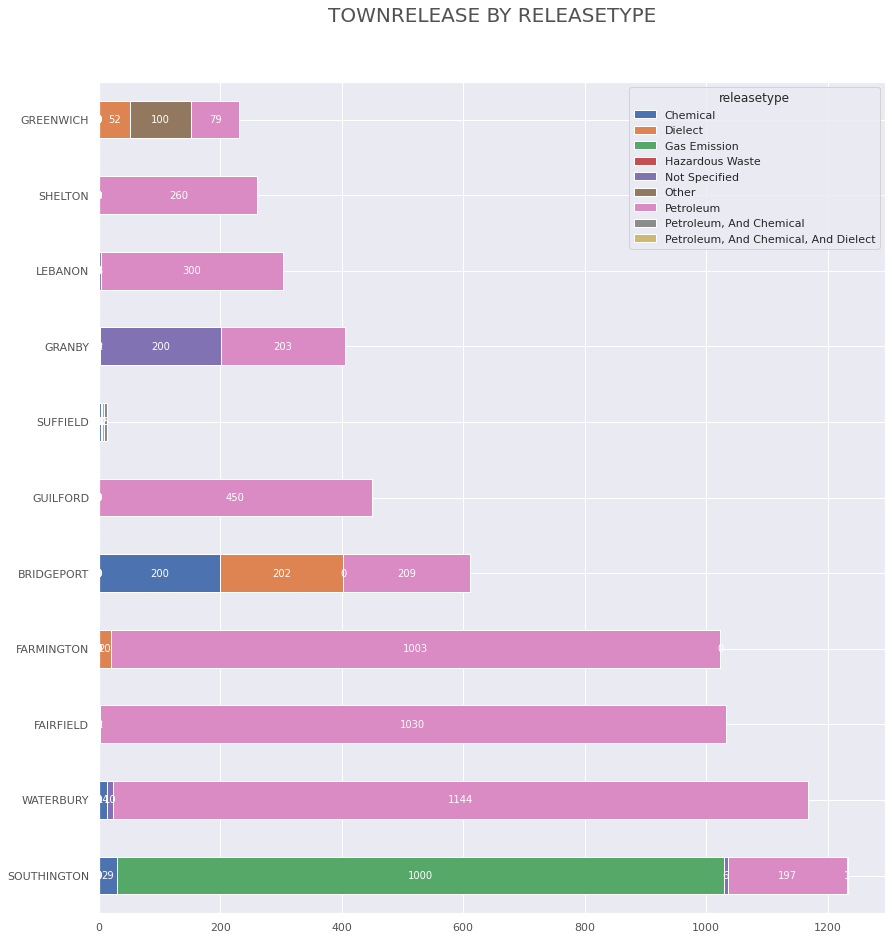

In [ ]:
font_color = '#525252' #Assigning Font Color

p5 = z.iloc[:, 1:-2].plot.barh(align='center', stacked=True, figsize=(15, 15) ) #Assiging data to plot

plt.pyplot.tight_layout() #To adjust pyplot paramters

title = plt.pyplot.title('TOWNRELEASE BY RELEASETYPE', pad=60, fontsize=20, color=font_color) #Title text and size creation
title.set_position([.5, 1.02]) #Title position

plt.pyplot.xticks(color=font_color ) #Assigning color to x label
plt.pyplot.yticks(color=font_color ) #Assigning color to y label

for p in p5.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    p5.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=10
            
            ) # Annotations on the graph (numbers)

plt.pyplot.subplots_adjust(top=0.8, left=0.26) # adjusts the plot axis width

### **PLOT 6: QUANGALLONS BY CAUSEINFO**

The plot 6 is a bar plot between the sum of quangallons on y-axis and the causeinfo on x-axis. This plot aims at highlighting hte mose common cases for a spillage incident. 

From the graph, we can say that the the most common causes are 'other' i.e. flow meter failure, leaking drum, bypass etc. followed by tank failure and mMV (motor vehicle) accidents.  

**Grouping the sum of quangallons by causeinfo and sorting the values in descending order**

In [ ]:
# causeinfo

x = df.groupby(["causeinfo"], as_index=False).agg({"quangallons": np.sum}) # aggregating the quangallons by their sum and by the causeinfo and asign it to dataframe x
x = x.sort_values("quangallons", ascending=False) # sorts the quangallon values from highest to lowest
x.head(5) # retrieves the first 5 rows

,causeinfo,quangallons
8,Other,3981.03
12,Tank Failure,2418.37
5,MV Accident,2075.51
10,Seepage,1000.35
1,Container Failure,702.75


Text(0.5, 1.0, 'QUANGALLONS BY CAUSEINFO')

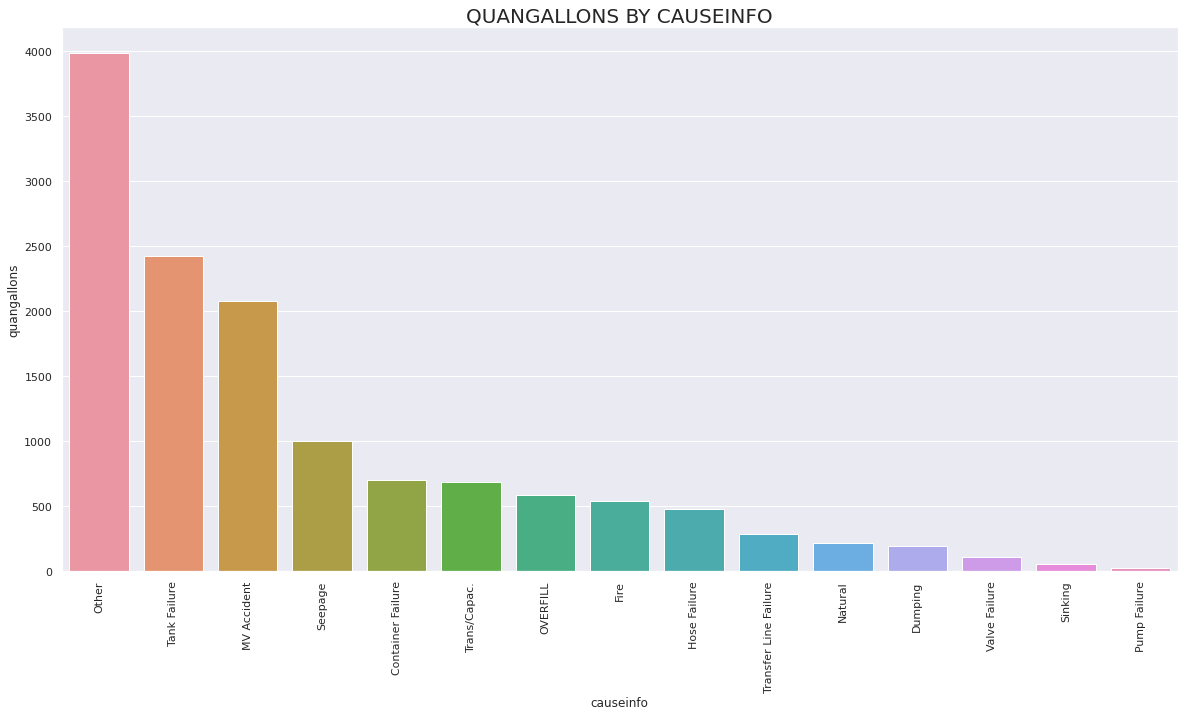

In [ ]:
plt.pyplot.figure(figsize = (20,10)) # restricts the x and y axis dimensions of the overall figure layout
p6 = sns.barplot(x="causeinfo", y="quangallons", data=x.iloc[:15]) # generates a barplot with specified x and y axis and limits the data to first 15 columns; saves to a new dataframe ax
p6.set_xticklabels(p6.get_xticklabels(),rotation = 90) # xticks are labelled vertically 
p6.set_title("QUANGALLONS BY CAUSEINFO", fontsize=20)

### **PLOT 7: CONTRACTORS COUNT BY CITY** 

***PRE-PROCESSING FOR THE PLOT 7***

The plot 7 is a plot between the count of contractors available in each city on y-axis and the list of cities on x-axis. This plot primarily aims at knowing the number of contractors available to handle the spillage incidents in each city. 

**Viewing the dataframe df again**

In [ ]:
df # shows the entire dataframe df

,year,caseno,assignedto,date_reported_time_reported,releasedatetime,townrelease,stateofrelease,reportedby,representing,repstate,location,releasetype,releasesubstance,quangallons,quanyards,quanfeet,quandrums,quanlbs,actions,causeinfo,mediainfo
0,2021,202104328,NO Response,2021-10-03 20:56:00,2021-10-03 20:00:00,BROOKFIELD,CT,Ken,Eversource,CT,3 Cherokee Drive,Dielect,Transformer Oil - PCBs >2 ppm,5.0,0.0,0,0,0,Contracted,MV Accident,Ground Surface
1,2021,202104327,NO Response,2021-10-03 19:59:00,2021-10-03 19:33:00,BLOOMFIELD,CT,Bill,FD,CT,450 Woodland Ave.,Petroleum,Gasoline,0.5,0.0,0,0,0,Sanded,MV Accident,Ground Surface
2,2021,202104326,NO Response,2021-10-03 19:51:00,2021-10-03 00:00:00,MANCHESTER,CT,fd,Self,CT,61 hills ave,Petroleum,gasoline,2.0,0.0,0,0,0,Sanded,MV Accident,Ground Surface
3,2021,202104325,NO Response,2021-10-03 18:05:00,2021-10-03 00:00:00,WOODBRIDGE,CT,fd,fd,CT,hollow oak rd,"Petroleum, And Chemical",motor vehicle fluids,10.0,0.0,0,0,0,"Sanded, and Cleaned",MV Accident,Ground Surface
4,2021,202104324,NO Response,2021-10-03 17:45:00,2021-10-03 14:50:00,CHESHIRE,CT,Kerry Komisky,Bozzutos,CT,400 Industrial Ave.,Petroleum,Diesel,2.0,0.0,0,0,0,Cleaned,Other,Ground Surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021,202103333,NO Response,2021-08-11 12:45:00,2021-08-11 00:00:00,GREENWICH,CT,gage,herbert recovery systems,CT,14 pierce rd,Petroleum,#2 FUEL OIL,0.0,0.0,0,0,0,Contracted,Tank Failure,Ground Surface
996,2021,202103332,NO Response,2021-08-11 12:41:00,2021-08-11 00:00:00,BERLIN,CT,fd,fd,CT,mill st and middletown rd,Chemical,ANTIFREEZE,2.0,0.0,0,0,0,"Sanded, and Cleaned",MV Accident,Ground Surface
997,2021,202103331,"SCALORA, RICH",2021-08-11 12:36:00,2021-08-11 00:00:00,SOMERS,CT,tolland dispatch,sfd,CT,22 hamden road,Dielect,pcb less than 5ppm tranformer oil,0.0,0.0,0,0,0,Other (speedy dry),MV Accident,Ground Surface
998,2021,202103330,NO Response,2021-08-11 12:26:00,2021-08-11 00:00:00,CANTON,CT,mike gaughan,eversource,CT,13 brookview circle,Dielect,TRANSFORMER OIL,3.0,0.0,0,0,0,"Contained, and Contracted",Trans/Capac.,Ground Surface


**Converting the townrelease to uppercase so as to maintain consistency and not miss out any city from the count due to case difference.** 

In [ ]:
df['townrelease'] = df['townrelease'].str.upper() # converting TownRelease to Upper Case
city_count = df.groupby([ "townrelease" ], as_index=False).agg({"quangallons": [ np.sum]}) # calculating Total number of gallons for each city
city_count.head(50) # to see first 50 rows

,townrelease,quangallons
,,sum
0,ANDOVER,5.00
1,ANSONIA,22.00
2,ASHFORD,2.00
3,AVON,11.00
4,BARKHAMSTED,52.00
5,BERLIN,7.00
6,BETHEL,0.10
7,BLOOMFIELD,37.50
8,BOLTON,5.00


**Grouping the counts of EPA_ID (contractor ID which is unique) by town in the external dataset**

In [ ]:
EXT_DATA_GROUP = EXT_DATA.groupby([ "Town" ], as_index=False).agg(Count=('EPA_ID', 'count')) # calculating count of contractors for each city

EXT_DATA_GROUP # to display dataframe

,Town,Count
0,BETHEL,1
1,BLOOMFIELD,1
2,BRANFORD,1
3,DANBURY,0
4,EAST HARTFORD,0
5,EAST WINDSOR,1
6,ELLINGTON,2
7,KILLINGWORTH,2
8,LEBANON,2
9,MERIDEN,2


**Merging the dataframes city_count and the EXT_DATA_GROUP on the city column**

We can see that the city column in given by 'townrelease' in the city_count dataframe and by Town' in the EXT_DATA_GROUP dataframe. Hece, we are doing both left on and right on while merging the two dataframes. This new dataframe is named as 'comb' which means combined. 

In [ ]:
comb = pd.merge(city_count, EXT_DATA_GROUP, how='inner', left_on = 'townrelease', right_on = 'Town') # merging external data on city column
comb #display combined dataset (comb)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(townrelease, )","(quangallons, sum)",Town,Count
0,BETHEL,0.10,BETHEL,1
1,BLOOMFIELD,37.50,BLOOMFIELD,1
2,BRANFORD,211.00,BRANFORD,1
3,DANBURY,85.50,DANBURY,0
4,EAST HARTFORD,84.55,EAST HARTFORD,0
5,EAST WINDSOR,51.00,EAST WINDSOR,1
6,ELLINGTON,2.00,ELLINGTON,2
7,KILLINGWORTH,1.00,KILLINGWORTH,2
8,LEBANON,303.00,LEBANON,2
9,MERIDEN,148.32,MERIDEN,2


### **PLOT 7: CONTRACTORS COUNT BY CITY** 

After the required pre-processing is done, we are plotting a bar graph of contractor count by city. 

The plot 7 is a plot between the count of contractors available in each city on y-axis and the list of cities on x-axis. This plot primarily aims at knowing the number of contractors available to handle the spillage incidents in each city. 

For example, more number of contractors are located in New Haven and then followed by Wallingford. 

Text(0.5, 1.0, 'CONTRACTORS COUNT BY CITY')

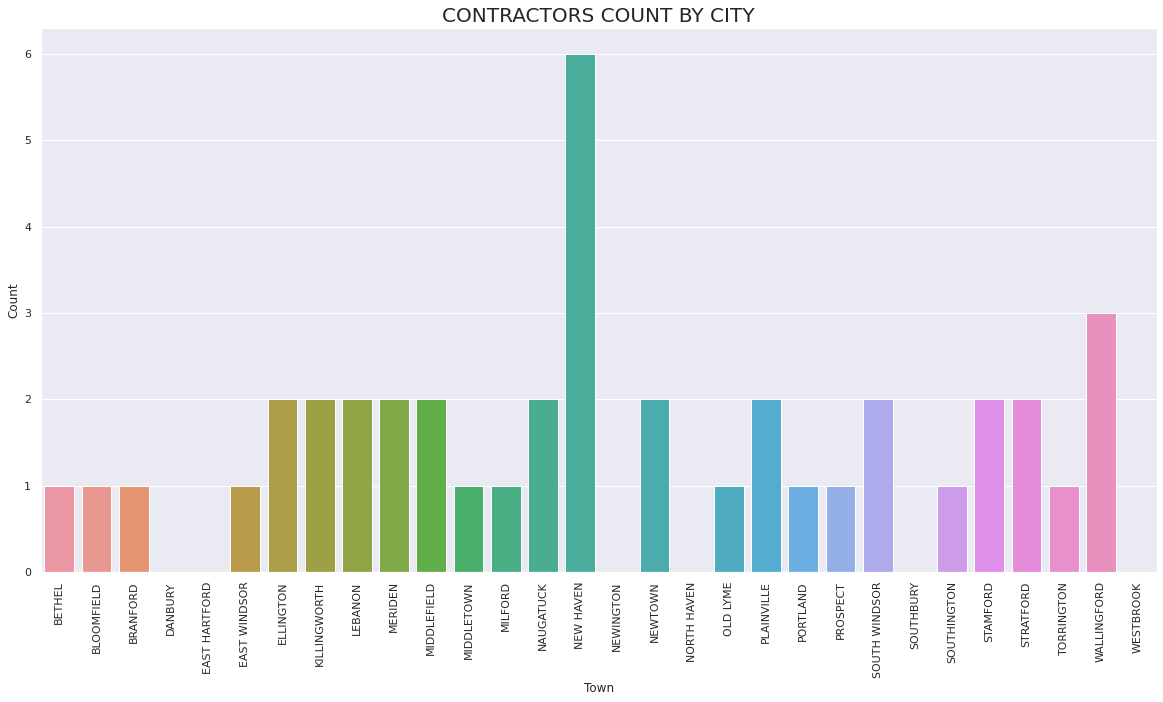

In [ ]:
plt.pyplot.figure(figsize = (20,10)) # restricts the x and y axis dimensions of the overall figure layout
p7 = sns.barplot(x="Town", y="Count", data=comb)
p7.set_xticklabels(p7.get_xticklabels(),rotation = 90) # xticks are labelled vertically
p7.set_title("CONTRACTORS COUNT BY CITY", fontsize=20)

# **3: CREW SCHEDULING - OPTIMIZATION**

### **Input Variables**
 
Gc = Quantity of spill in gallons in each city (where c = [Danbury, Middletown, Naugatuck])

### **Decision Variables**

Xc = Number of crews assigned to each city c (where c = [Danbury, Middletown, Naugatuck])

### **Objective Function**

**Case 1 - Minimization**

(G1 / X1) + (G2 / X2) + (G3 / X3)

**Case 2 - Minmax - Minimizing the below objective**

Max((G1 / X1), (G2 / X2), (G3 / X3)) 

### **Constraints**

X1, X2, X3 >= 1

X1 + X2 + X3 <= 10 

## **DATA PREPARATION FOR OPTIMIZATION**

**Filter the dataframe for target cities**

In the first step of data preparation for optimization, we filter the dataframe for the target cities namely Danbury, Middletown and Naugatuck and save the resulting data in a dataframe called 't5'. 

In [ ]:
t5 = df[df.townrelease.isin(["DANBURY", "MIDDLETOWN", "NAUGATUCK"])] # considering the assigned 3 cities # generates a dataframe called t5 from df where the cities are "Naugatuck", "Danbury" and "Middletown"

**Aggregating quangallons by cities**

In the second step of data preparation for optimization, we are aggregating the quangallons by the target cities and viewING the dataframe for top 5 rows.  

In [ ]:
t5 = t5.groupby("townrelease")["quangallons"].sum().reset_index() # aggregating the quangallons by cities
print(t5.shape)  # gives the number of rows and columns for the selected cities
t5.head() # retrieves the top 5 columns from the t5 dataframe

(3, 2)


,townrelease,quangallons
0,DANBURY,85.50
1,MIDDLETOWN,52.25
2,NAUGATUCK,42.25


**Renaming the columns quangallons as Gc and townrelease as cities**

In the last step of data preparation for optimization, to be in accordance with the nomenclature in given problem, we are renaming the columns accordingly i.e., Gc for quangallons in city c and hence townrelease is renamed as cities. 

In [ ]:
t5 = t5.rename(columns = {"quangallons" : "Gc", "townrelease" : "cities"}) # renaming quangallons as 'Gc' and townrelease as 'cities'
t5.head() # retrieves the top 5 columns from the t5 dataframe

,cities,Gc
0,DANBURY,85.50
1,MIDDLETOWN,52.25
2,NAUGATUCK,42.25


## **CASE 1 - MINIMIZATION (assignment of crews to cities to minimize the sum of repair times)** 

In this case, the target is to assign the crews to cities in such a fashion that minimizes the sum of the repair times. If G1, G2, G3 are the quantity of gallons in cities Danbury, Middletown and Naugatuck respectively and X1, X2, X3 are the number of crews assigned to each city respectively, then the case 1 is to minimize G1/X1 + G2/X2 + G3/X3 where Gc/Xc is the repair time. 

In [ ]:
cities = t5["cities"].to_list() # saving cities to list
Gc = t5["Gc"].to_list() # assigning sum(quangallons) to Gc

G1 = Gc[0]
G2 = Gc[1]
G3 = Gc[2]

# Assigning 1 crew to each city as each city should be assigned a minimum of one crew
Danbury_crew = 1 # assigning 1 crew to Danbury
Middletown_crew = 1 # assigning 1 crew to Middletown
Naugatuck_crew = 1 # assigning 1 crew to Naugatuck

best_repair_time= 300 # assuming best value as 300 as the maximum repair time cannot exceed even by assigning minimum crews to each city (sum of - quangallons divided by 1 crew for each city)

for X1 in range(1,11): # X1 takes the range of 1 to 10 for crew to be sent to Danbury
  
  for X2 in range(1,11-X1): # X2 is the number of crews to be sent to Middletown and takes the range of 1 to 10 minus the number of crews sent to Danbury 
  
    for X3 in range(1,11-X1-X2): # X3 is the number of crews to be sent to Naugatuck and takes the range of 1 to 10 minus the number of crews sent to Danbury and Middletown
  
      current_repair_time = G1/X1 + G2/X2 + G3/X3 # calculates current as the sum of repair times in all cities

      # print(current_repair_time, best_repair_time) # returns values of current and best repair times in each step of the loop
      
      if current_repair_time < best_repair_time: # condition for the optimized repair time where current is less than the best 
        
        best_repair_time = current_repair_time # assigns the optimal repair time value of current to best
        Danbury_crew = X1 # optimal number of crews to be sent to Danbury
        Middletown_crew = X2 # optimal number of crews to be sent to Middletown
        Naugatuck_crew = X3 # optimal number of crews to be sent to Naugatuck
        
        continue # checks for all the combinations of i, j, k

print("Number of crews to Danbury: ", Danbury_crew) # prints the optimal number of crews to be sent to Danbury
print("Number of crews to Middletown: ", Middletown_crew) # prints the optimal number of crews to be sent to Middletown
print("Number of crews to Naugatuck: ",  Naugatuck_crew) # prints the optimal number of crews to be sent to Naugatuck
print("Optimal repair time: ", best_repair_time) # prints the optimal repair time assigned to best defined before the loops
print((G1 / Danbury_crew), (G2 / Middletown_crew), (G3 / Naugatuck_crew)) # prints the optimal repair times of each cities 

Number of crews to Danbury:  4
Number of crews to Middletown:  3
Number of crews to Naugatuck:  3
Optimal repair time:  52.87500000000001
21.375 17.416666666666668 14.083333333333334


## **CASE 2 - MINMAX (assignment of crews to cities that minimizes the maximum repair time among all cities)**

In this case, the target is to assign the crews to cities in such a fashion that minimizes the maximum value of the repair times. If G1, G2, G3 are the quantity of gallons in cities Danbury, Middletown and Naugatuck respectively and X1, X2, X3 are the number of crews assigned to each city respectively, then the case 2 is to minimize the maximum repair time of the three cities i.e., G1/X1, G2/X2, G3/X3 where Gc/Xc is the repair time.

In [ ]:
cities = t5["cities"].to_list() # saving cities as a list
Gc = t5["Gc"].to_list() # assigning sum(quangallons) to Gc

G1 = Gc[0]
G2 = Gc[1]
G3 = Gc[2]

# Assigning 1 crew to each city as each city should be assigned a minimum of one crew
Danbury_crew = 1 # assigning 1 crew to Danbury
Middletown_crew = 1 # assigning 1 crew to Middletown
Naugatuck_crew = 1 # assigning 1 crew to Naugatuck

x = 1 # initial value of x is 1 where the future values of a will be stored from the loop
y = 1 # initial value of y is 1 where the future values of b will be stored from the loop
z = 1 # initial value of y is 1 where the future values of b will be stored from the loop
minmax = 100 # assuming minmax value as 100 as the maximum repair time of a city cannot exceed 100 even by assigning 1 crew to each city; the future minmax repair times will be stored from the loop

for X1 in range(1,11): # X1 takes the range of 1 to 10 for crew to be sent to Danbury
  
  for X2 in range(1,11-X1): # X2 is the number of crews to be sent to Middletown and takes the range of 1 to 10 minus the number of crews sent to Danbury 
  
    for X3 in range(1,11-X1-X2): # X3 is the number of crews to be sent to Naugatuck and takes the range of 1 to 10 minus the number of crews sent to Danbury and Middletown

      a = G1/X1 # repair time of Danbury city
      b = G2/X2 # repair time of Middletown city
      c = G3/X3 # repair time of Naugatuck city

      # print(minmax,max(x,y,z)) # returns values of minmax and max(a,b,c) in each step of the loop
     
      if max(a, b, c) < minmax: # condition for the optimized repair time where maximum of the repair time of individual cities is less than the minmax value
               
        Danbury_crew = X1 # number of crews to be sent to Danbury where the maximum of the repair times is minimized
        Middletown_crew = X2 # number of crews to be sent to Middletown where the maximum of the repair times is minimized
        Naugatuck_crew = X3 # number of crews to be sent to Naugatuck where the maximum of the repair times is minimized
       
        x = a # storing repair time of Danbury city to x when the above condition is satisfied
        y = b # storing repair time of Middletown city to y when the above condition is satisfied
        z = c # storing repair time of Naugatuck city to z when the above condition is satisfied
       
        total_repair_time = x + y + z # sum of the repair times in minmax condition
        minmax = max(x, y, z) # storing minmax time as the maximum of the repair times when the above condition is satisfied
        
        continue # checks for all the combinations of a, b, c 

print("Number of crews to Danbury: ", Danbury_crew) # prints the number of crews to be sent to Danbury
print("Number of crews to Middletown: ", Middletown_crew) # prints the number of crews to be sent to Middletown
print("Number of crews to Naugatuck: ",  Naugatuck_crew) # prints the number of crews to be sent to Naugatuck
print("Total repair time: ", total_repair_time) # prints the total repair time in minmax case
print("Minmax repair time: ", minmax) # prints the minmax repair time 
print(x, y, z) # prints the values of x, y, z i.e., the repair times for individual cities

Number of crews to Danbury:  5
Number of crews to Middletown:  3
Number of crews to Naugatuck:  2
Total repair time:  55.641666666666666
Minmax repair time:  21.125
17.1 17.416666666666668 21.125


# **OBSERVATIONS**









1.   Based on the given constraints for assigning minimum 1 crew to each city, the code assigns at least 1 crew even if there are no spills in a city i.e., even if the quangallons(Gc) value is 0. 
2.   The given cases are useful only if all the crews commence work at the same time. 
3.   The minmax case is observed to be one of the feasible solutions but not an optimal solution. 

# **CONCLUSIONS**



1.   The graph plotted on the external dataset (plot 7) between number of contractors in each city can be used along with the other graphs like most spillage incident in cities (plot 3). CT DEEP  may identify the locations where the spillages are frequent and plan for a new office location in or near the city. This will result in a reduced response time and enhances quick action before the severity of impact increases. From the plots we can say that  Southington has the highest spillage incidents where as New Haven has more contractors available. 
2.   For any value of quangallons the repair time will be lesser in case 1 , i.e, lesser total repair time in case of the minimzation case. 



# **RECOMMENDATIONS TO CT DEEP**

## **Scenarios where the above two models can be utilized**

**Scenario 1 - Cost Constraint** - When an additional constraint of cost is given where the overall cost paid to crews has to be minimized, then choosing the first model i.e., minimization works better. 

**Scenario 2 - Time Constraint** - When an additional constraint of time is given where the total time has to be minimized, then choosing the second model i.e., minmax works better. 

### **Scenario 1 - Cost Constraint**

**Case 1:**

Number of crews to Danbury:  4

Number of crews to Middletown:  3

Number of crews to Naugatuck:  3 

Optimal repair time:  **52.87500000000001**.

Repair times of Danbury, Middletown, Naugatuck: 

21.375, 17.416666666666668, 14.083333333333334 

**Case 2:**

Number of crews to Danbury:  5

Number of crews to Middletown:  3

Number of crews to Naugatuck:  2

Total repair time:  **55.641666666666666**.

Minmax repair time:  21.125

Repair times of Danbury, Middletown, Naugatuck:

17.1, 17.416666666666668, 21.125


**If the crews are to be paid on an total repair time basis and independent of the number of crews on-boarded per city, then case 1 is recommended.**

### **Scenario 2 - Time Constraint**

**Case 1:**

Number of crews to Danbury:  4

Number of crews to Middletown:  3

Number of crews to Naugatuck:  3

Optimal repair time:  52.87500000000001

Repair times of Danbury, Middletown, Naugatuck: 

**21.375***, 17.416666666666668, 14.083333333333334

**Case 2:**

Number of crews to Danbury:  5

Number of crews to Middletown:  3

Number of crews to Naugatuck:  2

Total repair time:  55.641666666666666 

Minmax repair time:  21.125

Repair times of Danbury, Middletown, Naugatuck:

17.1*, *17.416666666666668*, ***21.125**

**In comparison, the maximum repair time (minmax) is less in case 2. Hence, if all the assigned crews are expected to return early, then case 2 is recommended. However, for the current values the difference in maximum times is comparitively less.** 



# **RECOMMENDATIONS FOR FUTURE RESEARCH**



1.  Refined constraints with respect to cost and time. 
2.  Travel time for crews to the spill location.
3.  More information regarding efficiency of crews.
4.  Severity of releasetype (like severity rating of substance released as an additional column).
5. Crew Availability details for each location.


    





# **SOURCES**

1. https://github.com/jukuznets/jupyter-notebooks/blob/main/mpl-stacked.ipynb 
2. https://stackoverflow.com/questions/47138271/how-to-create-a-stacked-bar-chart-for-my-dataframe-using-seaborn 
3. https://portal.ct.gov/DEEP/Waste-Management-and-Disposal/Hazardous-Waste/Transporters
4. https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html